In [ ]:
!pip install -r requirements.txt

In [1]:
# -----------------------------------------------------------
# Dissertation Project: An Empirical Study on the Classification 
# Performance of Deep Learning vs. Gradient Boosting 
# on heterogeneous tabular data
#
# This module provides functions for running and analyzing results from the,
# TabNet model. It includes methods for model training, 
# performance evaluation, and interpretation of results.
#
# Author: Adam Mabrouk
# Supervisor: Ben Ralph
# Institution: University of Bath
# Created on: 01/01/2024
# Version: 1.0
#
# Acknowledgments:
# The tabNet architecture in this code has been inspired/adapted from the Authors: 
# Arik, S.Ö. and Pfister, T., 2021, May. Tabnet: Attentive interpretable tabular learning. 
# In Proceedings of the AAAI conference on artificial intelligence (Vol. 35, No. 8, pp. 6679-6687). 
# Source paper: https://arxiv.org/pdf/1908.07442v5.pdf
# Original TabNet architecture: https://github.com/google-research/google-research/blob/master/tabnet/tabnet_model.py 
# Author: Arik, S.Ö. and Pfister, T 
# The TabNet architecture has been inspired/adapted:
# Author: https://github.com/ostamand/tensorflow-tabnet/blob/master/tabnet/models/model.py 
# -----------------------------------------------------------
# Library Versions Used
# ----------------------
# Python version: 3.11.5 
# tensorflow version: 2.15.0

# Standard python imports for model training, time and to ignore warnings 
from time import time
import warnings

import numpy as np

warnings.filterwarnings('ignore')

# Python file imports
from tabnet_model import create_TabNet, optuna_tabnet_params
from tensorflow.keras.layers import Dropout
from model_training import ModelTraining
from Results import ModelResults
from data_loader import load_data

2024-02-28 12:25:24.267757: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
random_seed = np.random.randint(1,1000)

random_seed

525

- **Operating this notebook**

    - `Select dataset (Currently set to 5k)`
    - `Copy and past parameters from manual or optuna below`
    - `Select optuna to True to run or False to use manual (Currently set to True)`
    - `Uncomment to record results below (Currently set to not save results) If saved they are saved directly in the model_results_for_further_testing folder`

In [3]:
root_path = "."
data_source = "datasets"

"""Uncomment and choose dataset"""

data = 'lending_club_dataset'
# data = 'heloc_dataset'
# data = 'adult_income_dataset'
folder_name = data
subset_size = 5000 # put number 10k,

X_train, y_train, X_val, y_val, X_test, y_test = load_data(root_path, data_source, folder_name, subset_size)

In [4]:
"""Manual tunining for 30 epochs"""

# Adult income
# Dictionary containing your parameters with additional attributes
# best_params = {
#     "batch_size": 256, # 32, 16, 1024 # Good at 128
#     "na_nd_dimensions": 64, # from 32, 512 gets good results
#     "decision_steps": 6, # 9, 7, 6*!, 5, was 2 for value
#     "num_shared_decision_steps": 1, # 2, 3, was 4, 1 gives good results. 
#     "num_transform_blocks": 1, #4
#     "seed": seed, # 33, 450, 51, 11, 110, 312, 510, 630, 323, 210(=10th for ablation), 280, 370, 720, 444, 212, 
#     "relaxation_factor": 0.9, # relaxation factor 0.1, 0.9
#     "sparsity_coefficient": 0.000001, #0.00001, #0.00001, # 1e-5, 0.0000001, 0.000165, 0.00001
#     "batch_norm_momentum": 0.9, #0.9, # 0.6, 0.7
#     "learning_rate": 0.00001057845, #0.0001, #0.001, # 0.0001, try=0.001
#     "lr_reduce_factor": 0.3, #0.2, # 0.3
#     "lr_reduce_patience": 8, #8,
#     "lr_reduce_threshold": 0.00095, #0.0126, #0.00095,
#     "dropout_rate": 0.3,
# }

# HELOC
# MANUAL
# best_params = {
#     "batch_size": 512, # 32, 16, 1024 # Good at 128
#     "na_nd_dimensions": 128, # from 32, 512 gets good results
#     "decision_steps": 6, # 9, 7, 6*!, 5, was 2 for value
#     "num_shared_decision_steps": 1, # 2, 3, was 4, 1 gives good results. 
#     "num_transform_blocks": 1, #4
#     "seed": seed, # 33, 450, 51, 11, 110, 312, 510, 630, 323, 210(=10th for ablation), 280, 370, 720, 444, 212, 
#     "relaxation_factor": 0.9, # relaxation factor 0.1, 0.9
#     "sparsity_coefficient": 0.0000001, #0.00001, #0.00001, # 1e-5, 0.0000001, 0.000165, 0.00001
#     "batch_norm_momentum": 0.9, #0.9, # 0.6, 0.7
#     "learning_rate": 0.00001057845, #0.0001, #0.001, # 0.0001, try=0.001
#     "lr_reduce_factor": 0.3, #0.2, # 0.3
#     "lr_reduce_patience": 8, #8,
#     "lr_reduce_threshold": 0.00095, #0.0126, #0.00095,
#     "dropout_rate": 0.3,
# }
# Lending club
# best_params = {
#     "batch_size": 512, # 32, 16, 1024 # Good at 128
#     "na_nd_dimensions": 128, # from 32, 512 gets good results
#     "decision_steps": 6, # 9, 7, 6*!, 5, was 2 for value
#     "num_shared_decision_steps": 1, # 2, 3, was 4, 1 gives good results. 
#     "num_transform_blocks": 1, #4
#     "seed": seed, 
#     "relaxation_factor": 0.9, # relaxation factor 0.1, 0.9
#     "sparsity_coefficient": 0.00000001, #0.00001, #0.00001, # 1e-5, 0.0000001, 0.000165, 0.00001
#     "batch_norm_momentum": 0.9, #0.9, # 0.6, 0.7
#     "learning_rate": 0.00001057845, #0.0001, #0.001, # 0.0001, try=0.001
#     "lr_reduce_factor": 0.3, #0.2, # 0.3
#     "lr_reduce_patience": 8, #8,
#     "lr_reduce_threshold": 0.00095, #0.0126, #0.00095,
#     "dropout_rate": 0.3,
# }

'Manual tunining for 30 epochs'

In [5]:
"""Optuna tuning for 20 trials and 30 epochs"""
# Lending Club
# Best Trial ID: 9
# Best Trial Value (Performance Metric): 0.8976991176605225
# Optimal Hyperparameters:
#   batch_size: 64
#   na_nd_dimensions: 128
#   decision_steps: 9
#   num_shared_decision_steps: 0
#   seed: 400
#   relaxation_factor: 1.2
#   sparsity_coefficient: 0.016338244468180226
#   batch_norm_momentum: 0.8624860697517869
#   learning_rate: 0.024510316362973936
#   lr_reduce_factor: 0.28273639172739534
#   lr_reduce_patience: 9
#   lr_reduce_threshold: 0.02877783522437238

# Heloc
# Best Trial ID: 19
# Best Trial Value (Performance Metric): 0.7333130836486816
# Optimal Hyperparameters:
#   batch_size: 512
#   na_nd_dimensions: 64
#   decision_steps: 7
#   num_shared_decision_steps: 2
#   seed: 715
#   relaxation_factor: 1.0
#   sparsity_coefficient: 0.015209460503951519
#   batch_norm_momentum: 0.8970591971899484
#   learning_rate: 0.02204028387546968
#   lr_reduce_factor: 0.258908588192727
#   lr_reduce_patience: 10
#   lr_reduce_threshold: 5.767879102620306e-05

# Adult Income

# Best Trial ID: 15
# Best Trial Value (Performance Metric): 0.7193739414215088
# Optimal Hyperparameters:
#   batch_size: 128
#   na_nd_dimensions: 512
#   decision_steps: 3
#   num_shared_decision_steps: 3
#   seed: 154
#   relaxation_factor: 1.4
#   sparsity_coefficient: 0.06728154522646497
#   batch_norm_momentum: 0.9298491580591097
#   learning_rate: 0.012539802205022923
#   lr_reduce_factor: 0.20220980595985766
#   lr_reduce_patience: 8
#   lr_reduce_threshold: 0.0006508694794851896

'Optuna tuning for 20 trials and 30 epochs'

In [6]:
use_optuna = True #(select True or False)
checkpoint_name = "Tabnet"
log_dir = f"logs/TabNet/{time()}"
create_model_function = create_TabNet

seed = random_seed # 42
epochs = 30 #
verbose = 1
n_trials=20

# Dictionary containing your parameters with additional attributes
best_params = {
    "batch_size": 32, # 32, 16, 1024 # Good at 128
    "na_nd_dimensions": 128, # from 32, 512 gets good results
    "decision_steps": 6, # 9, 7, 6*!, 5, was 2 for value
    "num_shared_decision_steps": 1, # 2, 3, was 4, 1 gives good results. 
    "num_transform_blocks": 1, #4
    "seed": seed, 
    "relaxation_factor": 0.9, # relaxation factor 0.1, 0.9
    "sparsity_coefficient": 0.00000001, #0.00001, #0.00001, # 1e-5, 0.0000001, 0.000165, 0.00001
    "batch_norm_momentum": 0.9, #0.9, # 0.6, 0.7
    "learning_rate": 0.0023, #0.00001057845, #0.0001, #0.001, # 0.0001, try=0.001
    "lr_reduce_factor": 0.3, #0.2, # 0.3
    "lr_reduce_patience": 8, #8,
    "lr_reduce_threshold": 0.00095, #0.0126, #0.00095,
    "dropout_rate": 0.3,
}

params = optuna_tabnet_params if use_optuna else best_params

model_training = ModelTraining(seed, use_optuna,
                               checkpoint_name, log_dir, 
                               create_model_function, epochs, verbose, 
                               n_trials, params)

model, history, final_training_time = model_training.train_and_evaluate(X_train, 
                                                                        y_train,
                                                                        X_val, 
                                                                        y_val)

Best params: {'batch_size': 32, 'na_nd_dimensions': 128, 'decision_steps': 6, 'num_shared_decision_steps': 1, 'num_transform_blocks': 1, 'seed': 525, 'relaxation_factor': 0.9, 'sparsity_coefficient': 1e-08, 'batch_norm_momentum': 0.9, 'learning_rate': 0.0023, 'lr_reduce_factor': 0.3, 'lr_reduce_patience': 8, 'lr_reduce_threshold': 0.00095, 'dropout_rate': 0.3}
Epoch 1/30
125/125 [==============================] - 22s 36ms/step - loss: 0.6531 - auprc: 0.6755 - val_loss: 0.6774 - val_auprc: 0.8630
Epoch 2/30
125/125 [==============================] - 2s 18ms/step - loss: 0.6283 - auprc: 0.7095 - val_loss: 0.6467 - val_auprc: 0.8611
Epoch 3/30
125/125 [==============================] - 2s 17ms/step - loss: 0.6242 - auprc: 0.7041 - val_loss: 0.6310 - val_auprc: 0.8570
Epoch 4/30
125/125 [==============================] - 2s 17ms/step - loss: 0.6158 - auprc: 0.7206 - val_loss: 0.6338 - val_auprc: 0.8739
Epoch 5/30
125/125 [==============================] - 2s 17ms/step - loss: 0.6134 - aupr

In [7]:
model.summary()

Model: "tab_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  multiple                  72        
 Normalization)                                                  
                                                                 
 feature_transformation (Fe  multiple                  108618    
 atureTransformation)                                            
                                                                 
 feature_transformation_1 (  multiple                  108618    
 FeatureTransformation)                                          
                                                                 
 feature_transformation_2 (  multiple                  108618    
 FeatureTransformation)                                          
                                                                 
 feature_transformation_3 (  multiple                  1086

In [8]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

In [9]:
def display_optimal_hyperparameters(study, use_optuna, best_params=None):
    if use_optuna and study is not None:
        print("Best Trial ID:", study.best_trial.number)
        print("Best Trial Value (Performance Metric):", study.best_trial.value)
        print("Optimal Hyperparameters:")
        for key, value in study.best_trial.params.items():
            print(f"  {key}: {value}")
    elif not use_optuna and best_params is not None:
        print("Using predefined best parameters:")
        for key, value in best_params.items():
            print(f"  {key}: {value}")
    else:
        print("No hyperparameters available to display.")

display_optimal_hyperparameters(model_training.study, use_optuna, params)

Using predefined best parameters:
  batch_size: 32
  na_nd_dimensions: 128
  decision_steps: 6
  num_shared_decision_steps: 1
  num_transform_blocks: 1
  seed: 525
  relaxation_factor: 0.9
  sparsity_coefficient: 1e-08
  batch_norm_momentum: 0.9
  learning_rate: 0.0023
  lr_reduce_factor: 0.3
  lr_reduce_patience: 8
  lr_reduce_threshold: 0.00095
  dropout_rate: 0.3


In [10]:
# Results 

best_model = model

# results = ModelResults(best_model, X_test, y_test, X_train, "Tabnet", folder_name.replace("_dataset",""), history, model_training.study)

"""To not record the results uncomment below and comment above"""

results = ModelResults(model, X_test, y_test, X_train, None, None, history) 

16/16 [==============================] - 3s 6ms/step
              precision    recall  f1-score   support

           0       0.33      0.49      0.40        91
           1       0.87      0.78      0.82       409

    accuracy                           0.73       500
   macro avg       0.60      0.64      0.61       500
weighted avg       0.78      0.73      0.75       500



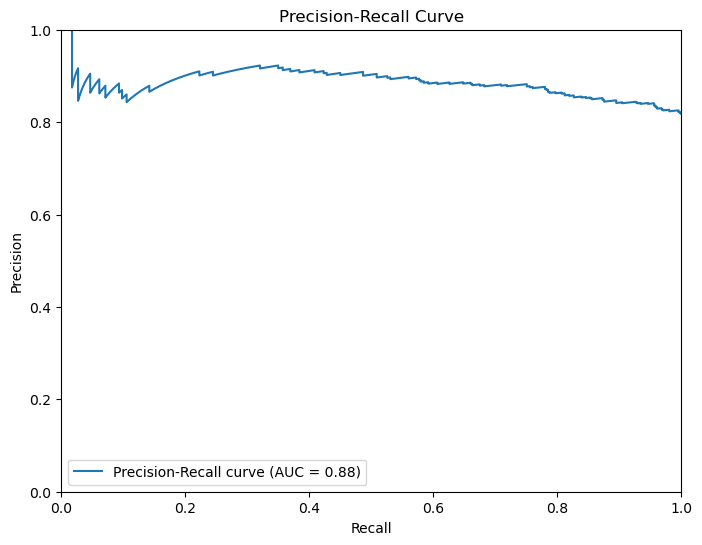

In [11]:
results.auprc()

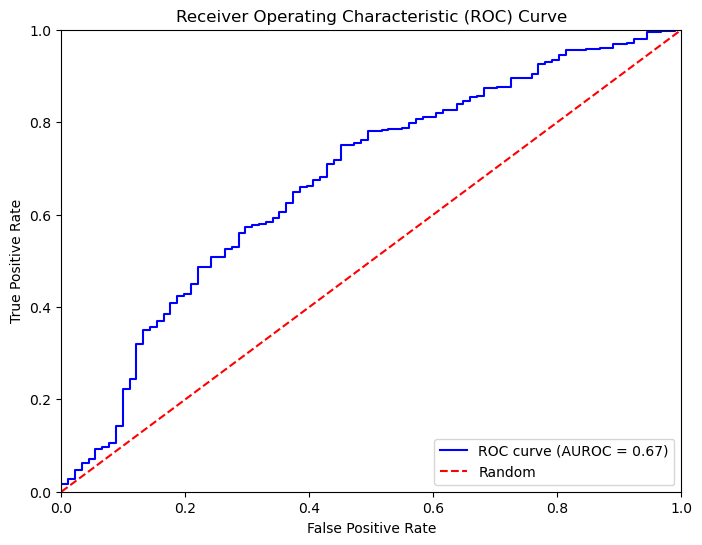

In [12]:
results.auroc()

In [13]:
results.display_metrics()

         Metric Value Percentage
4   Sensitivity  0.78      78.0%
5   Specificity  0.49      49.0%
6      Accuracy  0.73      73.0%
7     Precision  0.87      87.0%
8        Recall  0.78      78.0%
9      F1-score  0.82      82.0%
10       G-Mean  0.62      62.0%


True Negatives:  45
False Positives:  46
False Negatives:  90
True Positives:  319


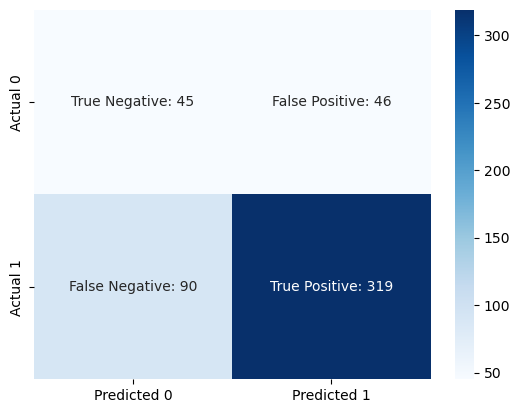

In [14]:
results.confusion_matrix()

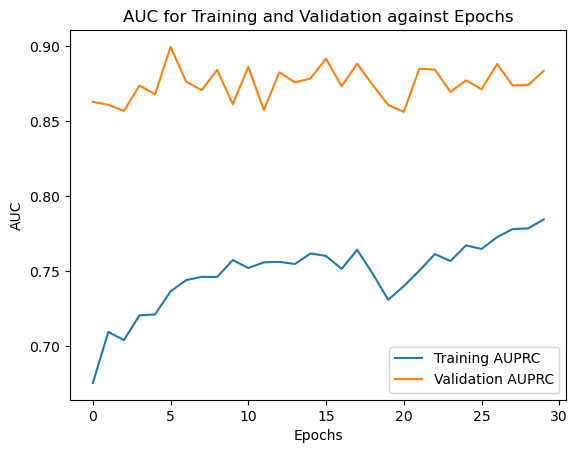

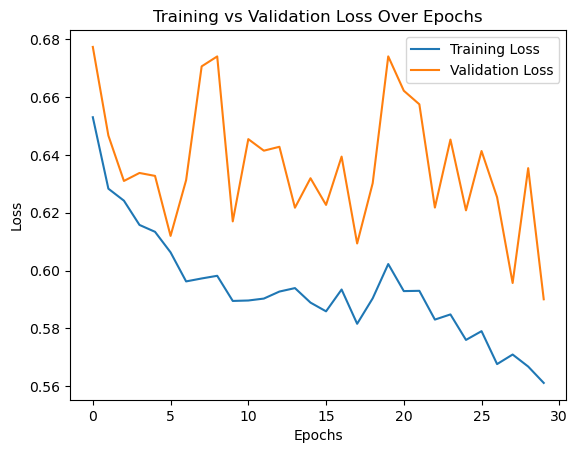

In [15]:
results.model_history()

In [16]:
inference_time = results.measure_inference_time()

16/16 [==============================] - 0s 6ms/step


In [17]:
results.save_time_results_to_csv(final_training_time, inference_time)

Results saved to time.csv


PermutationExplainer explainer: 21it [01:10,  3.93s/it]                        


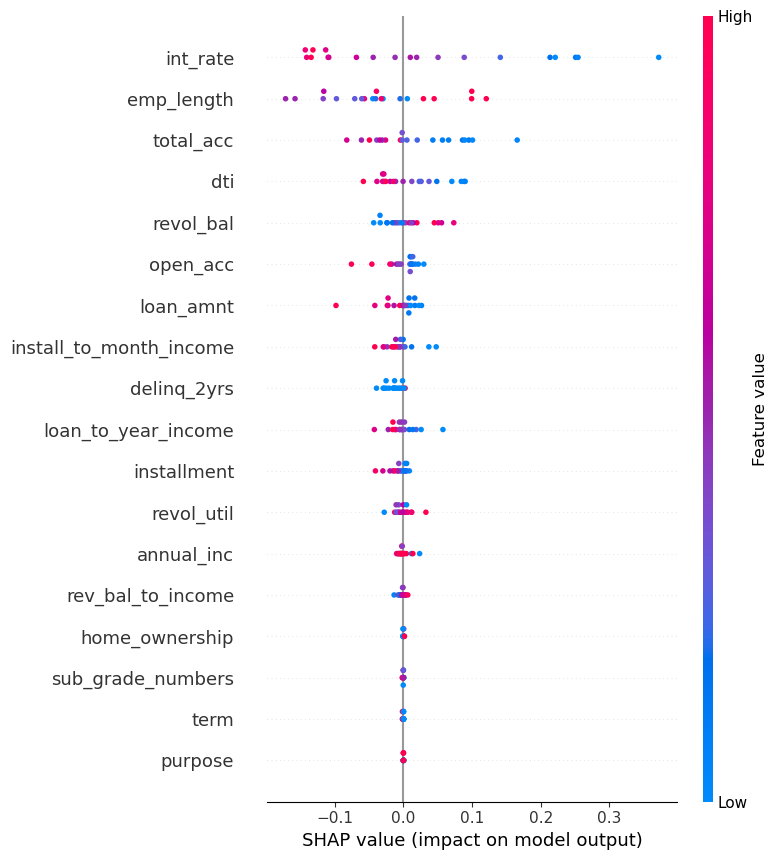

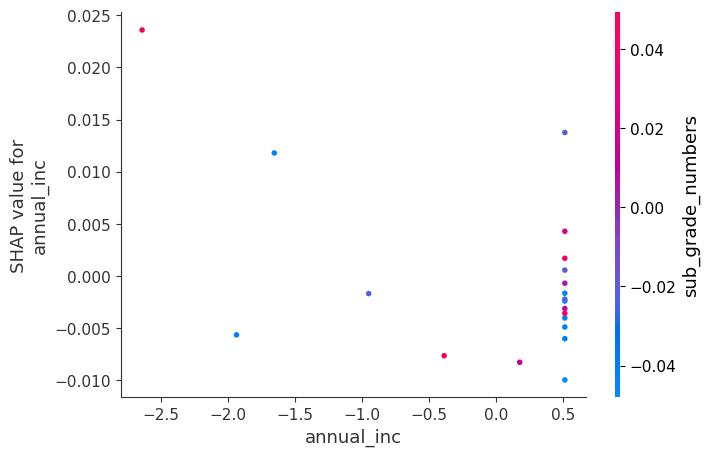

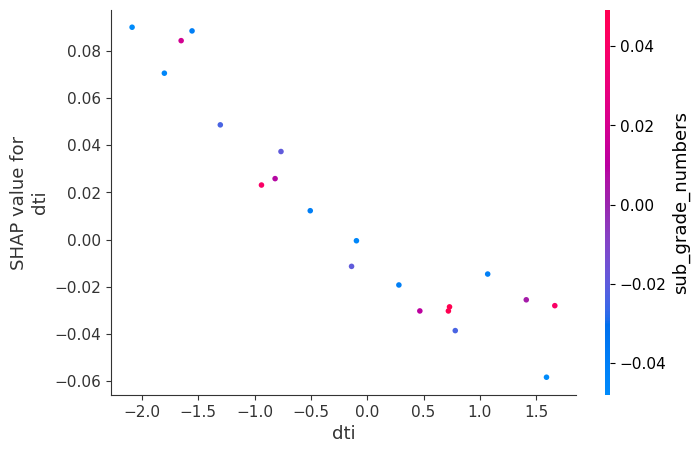

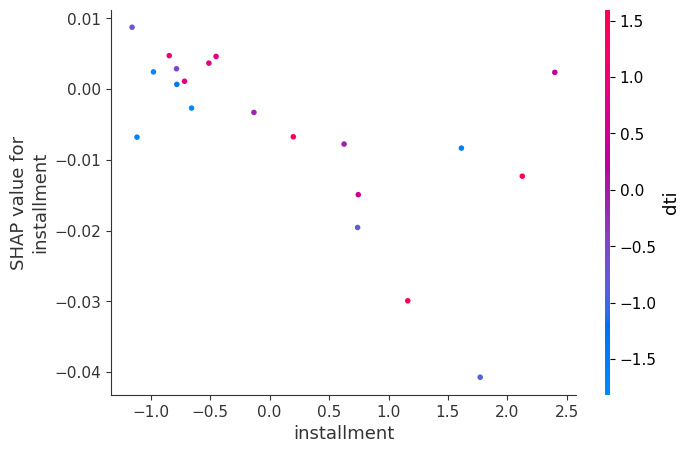

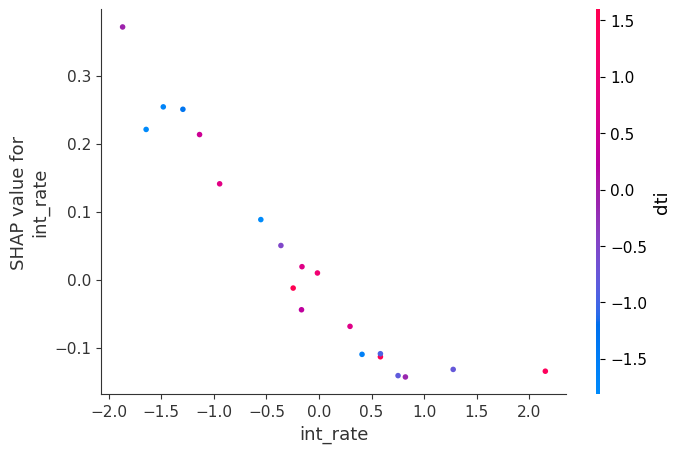

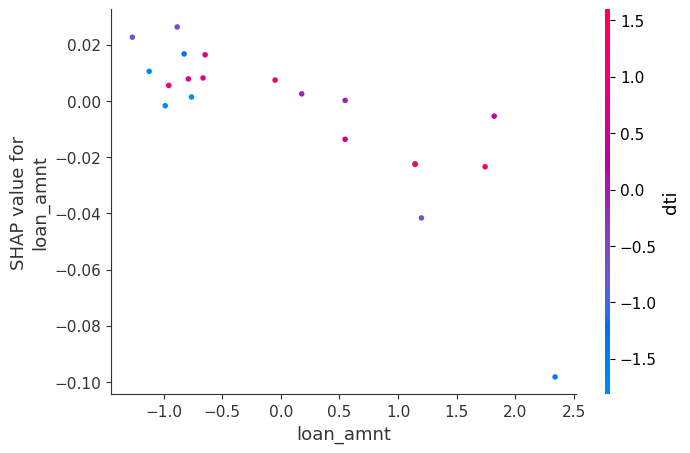

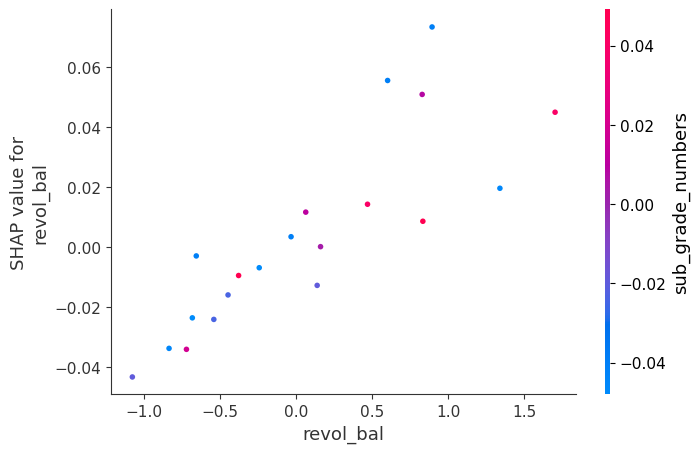

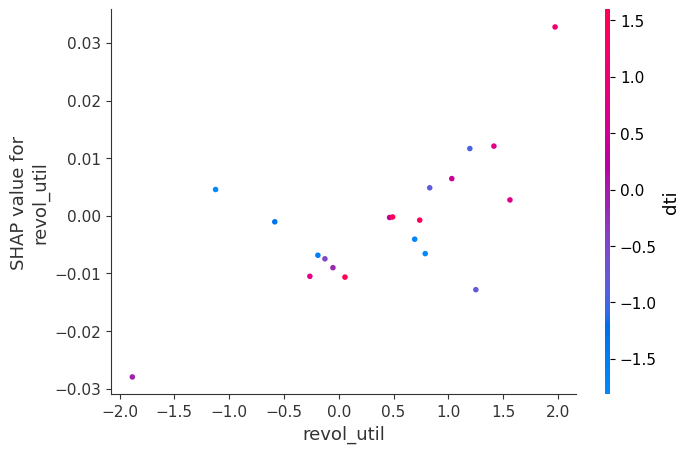

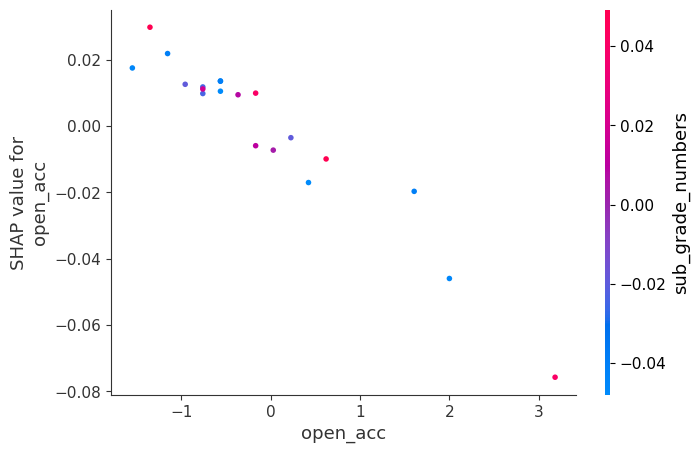

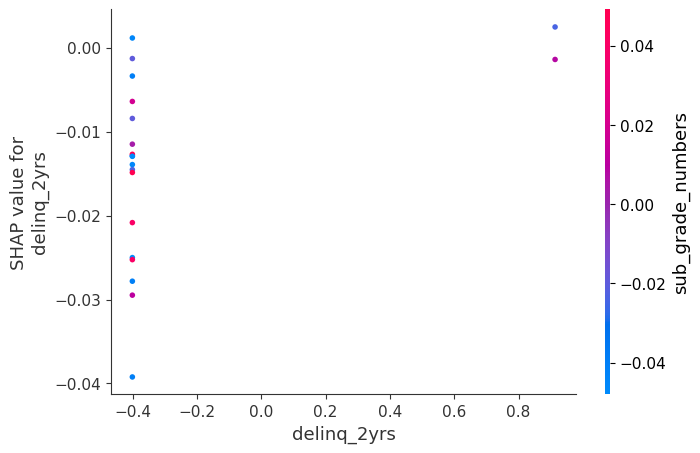

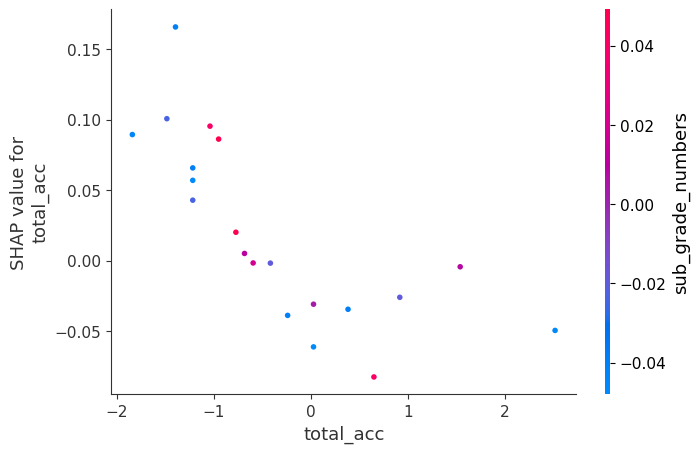

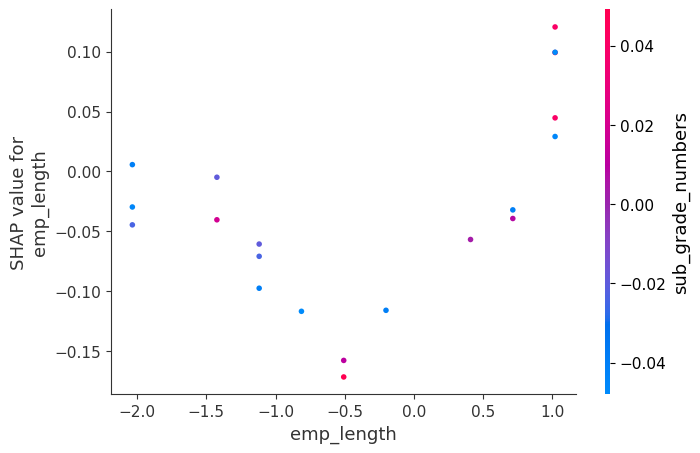

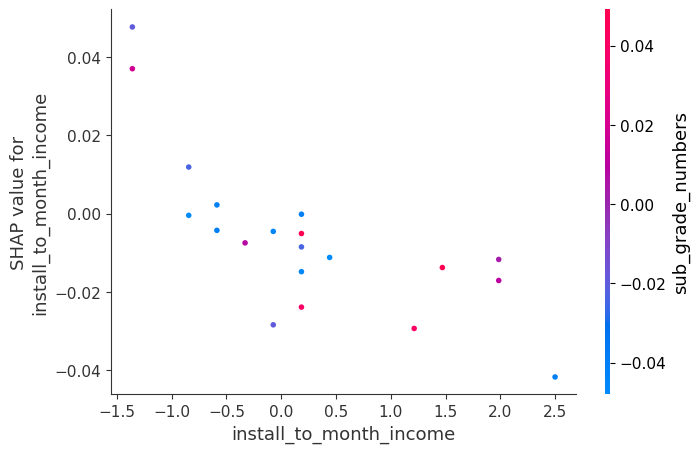

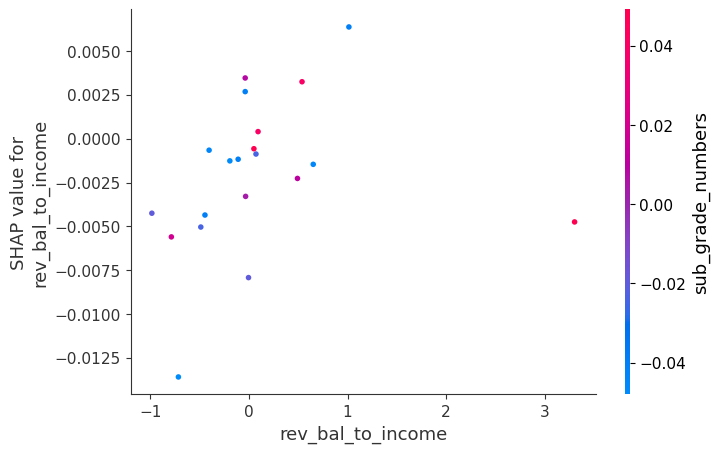

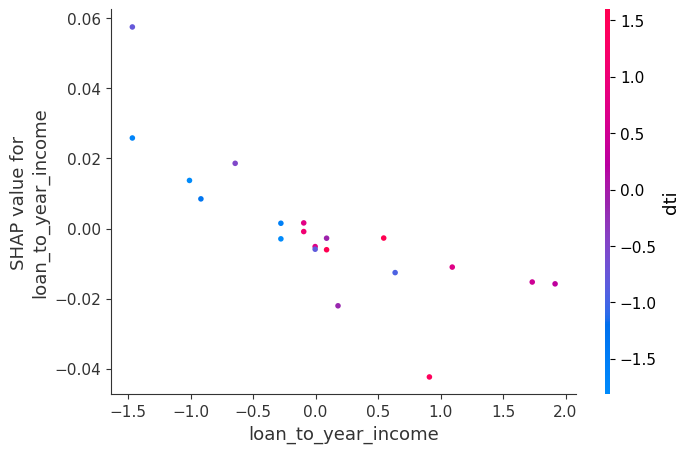

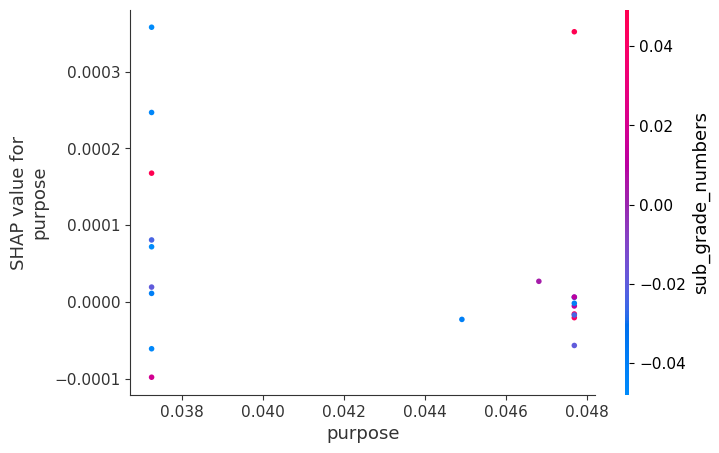

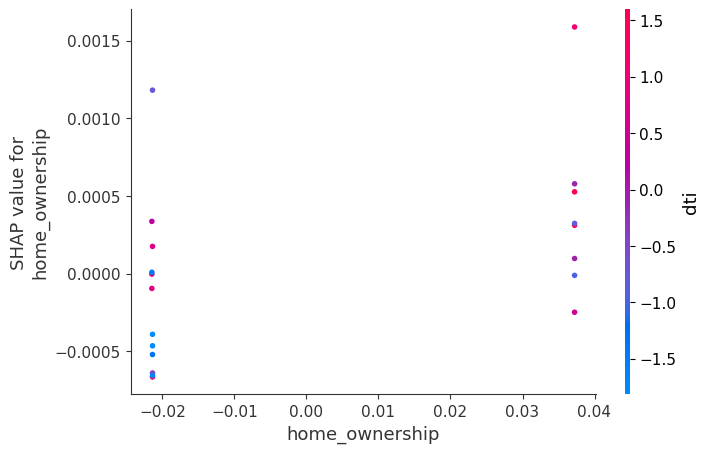

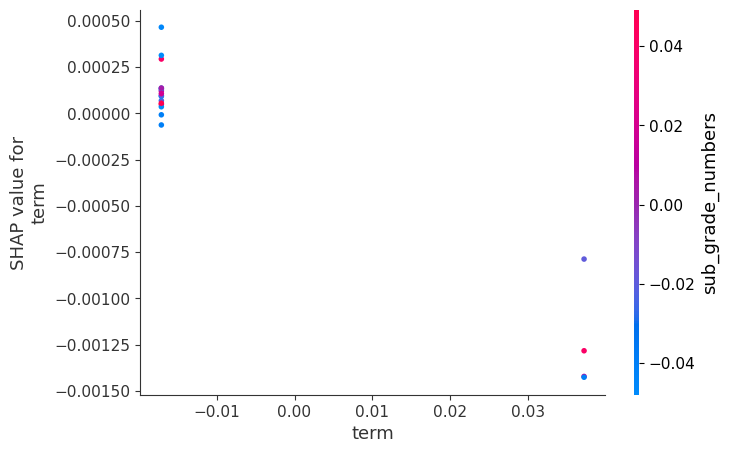

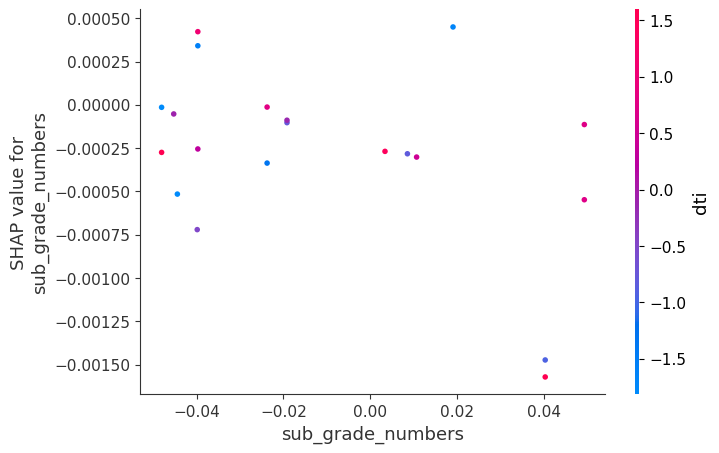

In [18]:
results.xai_shap() 

In [19]:
results.optuna_trials_history()

Cannot plot because optuna study was not given to ModelResults


In [20]:
results.optuna_slice_plot()

Cannot plot because optuna study was not given to ModelResults


In [21]:
results.optuna_hyperparameter_importances()

Cannot plot because optuna study was not given to ModelResults
